# Données TITANIC


### Goal for this Notebook:
Show a simple example of an analysis of the Titanic disaster in Python using a full complement of PyData utilities. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

#### This Notebook will show basic examples of: 
#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib

#### Data Analysis
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle



**Data Dictionary**

**surviva**l 	Survival 	0 = No, 1 = Yes
**pclass** 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
**sex**	    Sex 	
**Age** 	Age in years 	
**sibsp** 	# of siblings / spouses aboard the Titanic 	
**parch** 	# of parents / children aboard the Titanic 	
**ticket** 	Ticket number 	
**fare** 	Passenger fare 	
**cabin** 	Cabin number 	
**embarked** 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

**pclass: A proxy for socio-economic status (SES)**
1st = Upper
2nd = Middle
3rd = Lower

**age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5**

**sibsp: The dataset defines family relations in this way...**
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch: The dataset defines family relations in this way...**
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql

%matplotlib inline

## Chargement fichier

In [2]:
url="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train=pd.read_csv(url, index_col=None, na_values=['NA'])

In [3]:
# Suppression valeurs manquantes
train = train.dropna()

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Text(0.5,1,'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

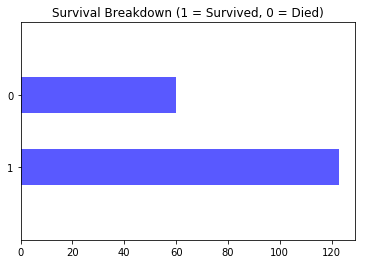

In [5]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(-1, 2)

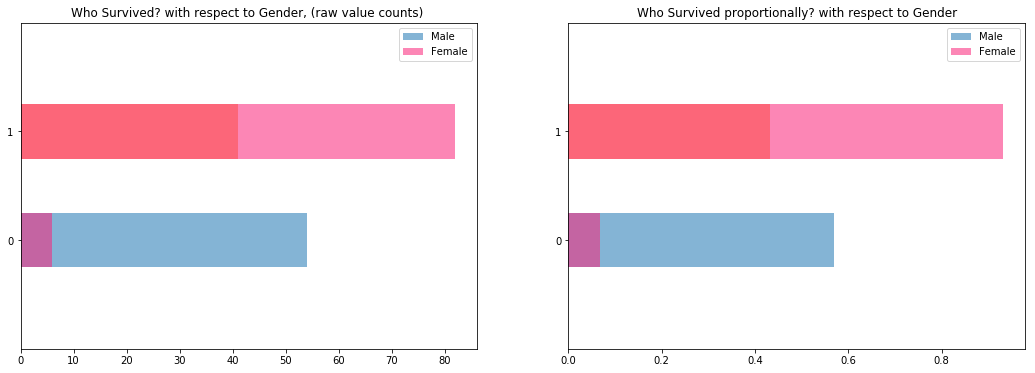

In [6]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
train_male = train.Survived[train.Sex == 'male'].value_counts().sort_index()
train_female = train.Survived[train.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
train_male.plot(kind='barh',label='Male', alpha=0.55)
train_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(train_male/float(train_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(train_female/float(train_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

In [7]:
# Set some variables
number_passengers = train.shape[0] 
number_survived = len(train[train.Survived == 1])

# What proportion of the passengers survived?
proportion_survived = float(number_survived) / number_passengers


In [8]:
# How can we determine what proportion of the women and of the men who survived?
# Let's start by segregating the men and women
women = train[train.Sex == "female"]
men = train[train.Sex != "female"]

# Determine the proportion of women who survived
proportion_women_survived = float(len(women[women.Survived == 1])) / len(women)
print 'The proportion of women who survived is %s.' % proportion_women_survived

# Determine the proportion of men who survived
proportion_men_survived = float(len(men[men.Survived == 1])) / len(men)
print 'The proportion of men who survived is %s.' % proportion_men_survived

The proportion of women who survived is 0.931818181818.
The proportion of men who survived is 0.431578947368.


In [9]:
# 'Sex' is stored as a text value. We should convert (or 'map') it into numeric binaries 
# so it will be ready for scikit-learn.
train['Sex'] = train['Sex'].map({'male': 0,'female': 1})

In [10]:
# Scikit-learn won't be tolerant of the missing values. In the last class, we dropped
# the 'Ticket' column. Let's also drop the 'Cabin' and 'Embarked' columns
train = train.drop(['Cabin'], axis=1)
train = train.drop(['Embarked'], axis=1)

In [11]:
# Let's also drop the 'Name' column for now (though I can think of some interesting 
# data that might be embedded in those salutations...)
train = train.drop(['Name'], axis=1)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# Load the test data
url="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
test=pd.read_csv(url, index_col=None, na_values=['NA'])

test["Age"] = test["Age"].fillna(train["Age"].median())

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

test = test.drop(['Cabin'], axis=1)
test = test.drop(['Embarked'], axis=1)
test = test.drop(['Name'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [14]:
# Initialize our algorithm
lr = LogisticRegression(random_state=1)

In [15]:
# Define our predictors
predictors = ["Pclass", "Sex", "Age", "SibSp"]
expected  = train["Survived"]

# Train the algorithm using all the training data
lr.fit(train[predictors], expected)

# Make predictions using the training set -- where we already know the correct answers
predicted = lr.predict(train[predictors])

In [16]:
# Make predictions based on the test data
predictions = lr.predict(test[predictors])

# Frame your submission for Kaggle
test_predictions = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
test_predictions.head(10)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,1
8,9,1
9,10,1


In [17]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
X = train[["Pclass", "Sex", "Age", "SibSp"]]
y = train["Survived"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
log_reg = lr.fit(X_train, y_train)

In [19]:
# Every estimator has a score method that can judge the quality of the 
# fit (or the prediction) on new data. Bigger is better.   
log_reg.score(X_test, y_test)

0.7567567567567568

In [20]:
from sklearn.metrics import classification_report

In [21]:
expected   = y_test
predicted  = log_reg.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Perished","Survived"])
print classificationReport

             precision    recall  f1-score   support

   Perished       0.57      0.73      0.64        11
   Survived       0.87      0.77      0.82        26

avg / total       0.78      0.76      0.76        37



In [22]:
# Make predictions based on the test data
predictions = log_reg.predict(test[predictors])

# Frame your 2nd submission to Kaggle
kgl_submission_lr = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
kgl_submission_lr.to_csv('lr_model.csv', index=False)

In [23]:
from sklearn.ensemble import RandomForestClassifier

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
# We'll select 50 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=50, oob_score=True)

In [25]:
# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [26]:
rf.score(X_test, y_test)

0.8108108108108109

In [27]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Perished","Survived"])
print classificationReport

             precision    recall  f1-score   support

   Perished       1.00      0.56      0.72        16
   Survived       0.75      1.00      0.86        21

avg / total       0.86      0.81      0.80        37



In [28]:
def plot_classification_report(cr, title='Classification report', cmap=plt.cm.Reds):

    lines = cr.split('\n')
    classes = []
    plotMat = []

    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    fig, ax = plt.subplots(1)
    fig = plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    
    for c in range(len(plotMat)+1):
        for r in range(len(classes)):
            try:
                txt = plotMat[r][c]
                ax.text(c,r,plotMat[r][c],va='center',ha='center')
            except IndexError:
                pass
            
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

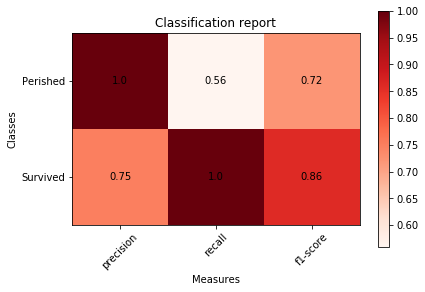

In [29]:
plot_classification_report(classificationReport)

In [30]:
# Make predictions based on the test data
predictions = rf.predict(test[predictors])

# Frame your 3rd submission to Kaggle
kgl_submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
kgl_submission_rf.to_csv('rf_model.csv', index=False)

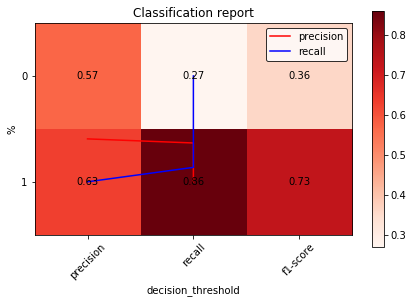

In [31]:
from sklearn.svm import SVC


kernels = ['linear', 'poly', 'rbf']

splits     = cross_validation.train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)

model.fit(X_train, y_train)
expected   = y_test
predicted  = model.predict(X_test)

SVC_report = classification_report(expected, predicted)


plot_classification_report(SVC_report)


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted)  
decision_threshold = np.append(thresholds, 1)

plt.plot(decision_threshold, precision, color='red')  
plt.plot(decision_threshold, recall, color='blue')  
leg = plt.legend(('precision', 'recall'), frameon=True)  
leg.get_frame().set_edgecolor('k')  
plt.xlabel('decision_threshold')  
plt.ylabel('%')  
plt.show


# Make predictions based on the test data
predictions = model.predict(test[predictors])

# Frame your 4th submission to Kaggle
kgl_submission_svm = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
kgl_submission_svm.to_csv('svm_model.csv', index=False)

